In [1]:
# Declaring the packages
using Pkg,CSV
using DataFrames
using HTTP , JSON

In [3]:
#Declaring the URL
url="https://opendata.arcgis.com/datasets/a163c5addf2c4b7f9079f08751bd2e1a_0.geojson?where=crashYear%20%3E%3D%202018%20AND%20crashYear%20%3C%3D%202018"

"https://opendata.arcgis.com/datasets/a163c5addf2c4b7f9079f08751bd2e1a_0.geojson?where=crashYear%20%3E%3D%202018%20AND%20crashYear%20%3C%3D%202018"

In [5]:
#Using HTTP protocol to fetch the details from URL
response = HTTP.get(url)

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Server: openresty
Date: Tue, 22 Oct 2019 10:22:20 GMT
Content-Type: application/json; charset=utf-8
Transfer-Encoding: chunked
Connection: keep-alive
Vary: Accept-Encoding
Content-disposition: attachment; filename=Crash_Analysis_System_CAS_data.geojson
Last-Modified: Thu, 10 Oct 2019 04:50:14 GMT
ETag: W/"c07d2036c74641b217748b437a138125"
x-amz-meta-retrieved_at: 2019-08-09T03:22:23.000Z

{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"OBJECTID_1":1312521,"OBJECTID":646826,"crashYear":2018,"crashFinan":"2017/2018","crashSever":"F","fatalCount":1,"seriousInj":1,"minorInjur":0,"multiVehic":"Multi vehicle","holiday":"Christmas/New Year","regionDesc":"Wellington          ","tlaID":48,"tlaName":"Masterton District","areaUnitID":578301,"meshblockI":2254000,"easting":1827151,"northing":5463231,"crashLocat":"MASTERTON-CASTLEPOINT ROA","crashLoc_1":"MCKINSTRY AVENUE","outdatedLo":"Current location","crashRPRS":0,"intersecti":"

In [5]:
#Parsing the HTTPS response to JSON format
crash_data=JSON.parse(String(response.body))

Dict{String,Any} with 2 entries:
  "features" => Any[Dict{String,Any}("properties"=>Dict{String,Any}("vanOrUtili…
  "type"     => "FeatureCollection"

In [6]:
global df=DataFrame(crash_data["features"][1]["properties"])

,OBJECTID,OBJECTID_1,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,646826,1312521,0,0,0,578301,0,0


In [7]:
# Removing the columns with missing values
df = deletecols!(df, [:crashRPDir,:crashRPSH,:crashDirec,:crashRPNew,:roadLane])

┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller = top-level scope at In[7]:1
└ @ Core In[7]:1


,OBJECTID,OBJECTID_1,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,646826,1312521,0,0,0,578301,0,0


In [8]:
#Consolidating multiple dataframe into one dataframe
for i = 1:length(crash_data["features"])
    ##println("--Extracting--Dataset--")
    datadict1 = crash_data["features"][i]["properties"]
    df1=DataFrame(datadict1)
    global df 
    df1 = deletecols!(df1, [:crashRPDir,:crashRPSH,:crashDirec,:crashRPNew,:roadLane])
    df = append!(df1,df) 
end

┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller = top-level scope at In[8]:6
└ @ Core .\In[8]:6


In [9]:
CSV.write("CrashAnalysis.csv",df)

"CrashAnalysis.csv"

In [1]:
#  Reading crash analysis file just created above into the new dataframe for further
# analysis
using DataFrames 

CrashAnalysis_df = readtable("CrashAnalysis.csv")

┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = top-level scope at In[1]:4
└ @ Core In[1]:4
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames C:\Users\user\.julia\packages\DataFrames\Iyo5L\src\abstractdataframe\show.jl:39


,OBJECTID,OBJECTID_1,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,674159,1339847,0,0,0,538742,0,0
2,674158,1339846,0,0,0,561300,0,0
3,674157,1339845,0,0,0,510700,0,0
4,674156,1339844,0,0,0,507900,0,0
5,674155,1339843,0,0,0,506615,0,0
6,674154,1339842,0,0,0,506642,0,0
7,674153,1339841,0,0,0,501809,0,0
8,674152,1339840,0,0,0,506614,0,0
9,674151,1339839,0,0,0,514103,0,0


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Union, ::Int64) at show.jl:39
└ @ DataFrames C:\Users\user\.julia\packages\DataFrames\Iyo5L\src\abstractdataframe\show.jl:39


In [2]:
# displaying the column names in the dataset
names(CrashAnalysis_df)

83-element Array{Symbol,1}:
 :OBJECTID  
 :OBJECTID_1
 :Pedestrian
 :advisorySp
 :animals   
 :areaUnitID
 :bicycle   
 :bridge    
 :bus       
 :carStation
 :cliffBank 
 :cornerRoad
 :crashDista
 ⋮          
 :trafficIsl
 :trafficSig
 :train     
 :tree      
 :truck     
 :unknownVeh
 :urban     
 :vanOrUtili
 :vehicle   
 :waterRiver
 :weatherA  
 :weatherB  

In [3]:
CrashAnalysis_df[:roadCurvat]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1


27649-element Array{Union{Missing, String},1}:
 "Straight Road" 
 "Straight Road" 
 "Straight Road" 
 "Moderate Curve"
 "Moderate Curve"
 "Straight Road" 
 "Straight Road" 
 "Moderate Curve"
 "Straight Road" 
 "Moderate Curve"
 "Straight Road" 
 "Straight Road" 
 "Moderate Curve"
 ⋮               
 "Moderate Curve"
 "Moderate Curve"
 "Straight Road" 
 "Straight Road" 
 "Moderate Curve"
 "Moderate Curve"
 "Straight Road" 
 "Moderate Curve"
 "Straight Road" 
 "Straight Road" 
 "Straight Road" 
 "Straight Road" 

In [2]:
# Calculating number of road fatalities for each road curvature
RoadCurvVsRoadAcc_df=by(CrashAnalysis_df,:roadCurvat, d -> DataFrame(count=nrow(d)))

,roadCurvat,count
,String⍰,Int64
1,Straight Road,19981
2,Moderate Curve,6958
3,Severe Curve,50
4,Easy Curve,659
5,Unknown,1


In [3]:
RoadCurvVsRoadAcc_df = RoadCurvVsRoadAcc_df[setdiff(1:end, 5), :]
RoadCurvVsRoadAcc_df

,roadCurvat,count
,String⍰,Int64
1,Straight Road,19981
2,Moderate Curve,6958
3,Severe Curve,50
4,Easy Curve,659


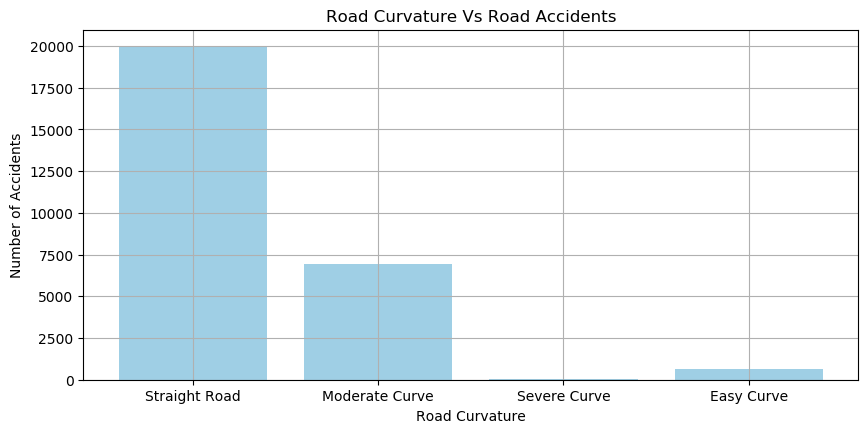

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:3
└ @ Core In[4]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5


PyObject Text(24.000000000000014, 0.5, 'Number of Accidents')

In [4]:
# Bar Plot for number of road fatalities in each road curvature 
using PyPlot

x=RoadCurvVsRoadAcc_df[:roadCurvat]
y=RoadCurvVsRoadAcc_df[:count]

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(x,y,color="#0f87bf",align="center",alpha=0.4)
axis("tight")
PyPlot.title("Road Curvature Vs Road Accidents")
grid("on")
xlabel("Road Curvature")
ylabel("Number of Accidents")

In [8]:
using Statistics
RoadCurvVsRoadAcc_df=by(CrashAnalysis_df,:roadCurvat, d -> DataFrame(avgSpeedLimit=mean(CrashAnalysis_df[:speedLimit])))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = (::getfield(Main, Symbol("##7#8")))(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}) at In[8]:2
└ @ Main .\In[8]:2


,roadCurvat,avgSpeedLimit
,String⍰,Float64
1,Straight Road,67.537
2,Moderate Curve,67.537
3,Severe Curve,67.537
4,Easy Curve,67.537
5,Unknown,67.537


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames C:\Users\user\.julia\packages\DataFrames\Iyo5L\src\abstractdataframe\show.jl:39


In [7]:
 # Road condtion for Straight Road
 using DataFramesMeta
CrashAnalysis_StraightRd= @where(CrashAnalysis_df, :roadCurvat .== "Straight Road")

CrashAnalysis_StraightRd=by(CrashAnalysis_StraightRd,:roadWet, d -> DataFrame(count=nrow(d)))

,roadWet,count
,String⍰,Int64
1,Dry,14915
2,Wet,4882
3,Ice/ Snow,107
4,Unknown,77


In [8]:
  # Road condtion for road Moderate Curve Road
 using DataFramesMeta
CrashAnalysis_ModCurve= @where(CrashAnalysis_df, :roadCurvat .== "Moderate Curve")

CrashAnalysis_ModCurve=by(CrashAnalysis_ModCurve,:roadWet, d -> DataFrame(count=nrow(d)))

,roadWet,count
,String⍰,Int64
1,Dry,3968
2,Wet,2822
3,Ice/ Snow,161
4,Unknown,7


In [9]:
# Road condtion for Severe Curve Road
using DataFramesMeta
CrashAnalysis_SevereCurve= @where(CrashAnalysis_df, :roadCurvat .== "Severe Curve")

CrashAnalysis_SevereCurve=by(CrashAnalysis_SevereCurve,:roadWet, d -> DataFrame(count=nrow(d)))

,roadWet,count
,String⍰,Int64
1,Wet,18
2,Dry,32


In [3]:
 # Road condtion for Easy Curve Road
 using DataFramesMeta
CrashAnalysis_EasyCurve= @where(CrashAnalysis_df, :roadCurvat .== "Easy Curve")

CrashAnalysis_EasyCurve=by(CrashAnalysis_EasyCurve,:roadWet, d -> DataFrame(count=nrow(d)))

,roadWet,count
,String⍰,Int64
1,Dry,466
2,Wet,175
3,Unknown,13
4,Ice/ Snow,5


In [3]:
# Light condtion for  Straight Road
using DataFramesMeta
CrashAnalysis_StraightRd= @where(CrashAnalysis_df, :roadCurvat .== "Straight Road")

CrashAnalysis_StraightRd=by(CrashAnalysis_StraightRd,:light, d -> DataFrame(count=nrow(d)))

,light,count
,String⍰,Int64
1,Dark,5964
2,Bright Sun,6945
3,Overcast,6010
4,Twilight,1049
5,Unknown,13


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames C:\Users\user\.julia\packages\DataFrames\Iyo5L\src\abstractdataframe\show.jl:39


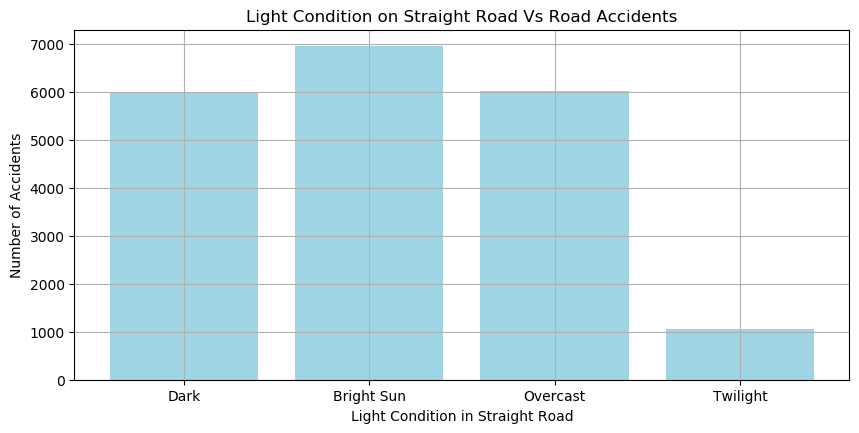

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[6]:4
└ @ Core In[6]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[6]:5
└ @ Core In[6]:5


PyObject Text(24.0, 0.5, 'Number of Accidents')

In [6]:
# Bar Plot for number of road fatalities in different light condition 
using PyPlot
CrashAnalysis_StraightRd = CrashAnalysis_StraightRd[setdiff(1:end, 5), :]
x=CrashAnalysis_StraightRd[:light]
y=CrashAnalysis_StraightRd[:count]

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(x,y,color="#0f87bf",align="center",alpha=0.4)
axis("tight")
PyPlot.title("Light Condition on Straight Road Vs Road Accidents")
grid("on")
xlabel("Light Condition in Straight Road")
ylabel("Number of Accidents")

In [6]:
# Light condtion for  Moderate Curve
using DataFramesMeta
CrashAnalysis_ModCurve= @where(CrashAnalysis_df, :roadCurvat .== "Moderate Curve")

CrashAnalysis_ModCurve=by(CrashAnalysis_ModCurve,:light, d -> DataFrame(count=nrow(d)))

,light,count
,String⍰,Int64
1,Dark,2442
2,Overcast,2467
3,Bright Sun,1719
4,Twilight,330


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames C:\Users\user\.julia\packages\DataFrames\Iyo5L\src\abstractdataframe\show.jl:39


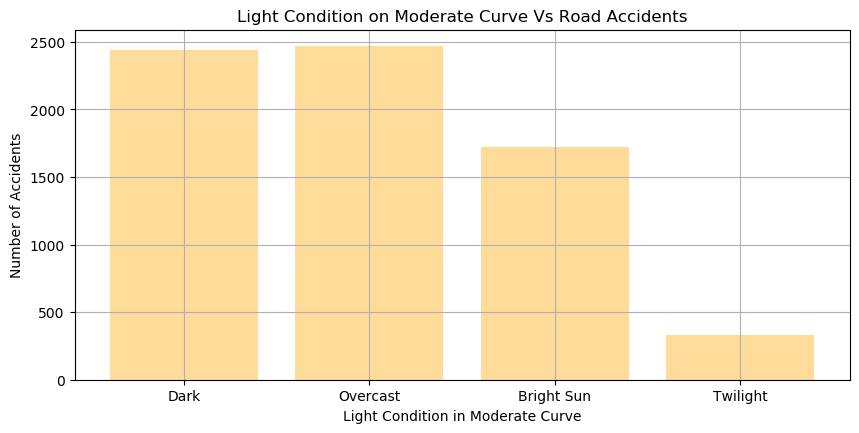

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[7]:3
└ @ Core In[7]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[7]:5
└ @ Core In[7]:5


PyObject Text(24.000000000000014, 0.5, 'Number of Accidents')

In [7]:
# Bar Plot for number of road fatalities in different light condition 
using PyPlot

x=CrashAnalysis_ModCurve[:light]
y=CrashAnalysis_ModCurve[:count]

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(x,y,color="#FFA500",align="center",alpha=0.4)
axis("tight")
PyPlot.title("Light Condition on Moderate Curve Vs Road Accidents")
grid("on")
xlabel("Light Condition in Moderate Curve")
ylabel("Number of Accidents")

In [8]:
 # Light condtion for  Severe Curve
 using DataFramesMeta
CrashAnalysis_SevereCurve= @where(CrashAnalysis_df, :roadCurvat .== "Severe Curve")

CrashAnalysis_SevereCurve=by(CrashAnalysis_SevereCurve,:light, d -> DataFrame(count=nrow(d)))

,light,count
,String⍰,Int64
1,Dark,17
2,Overcast,16
3,Bright Sun,15
4,Twilight,2


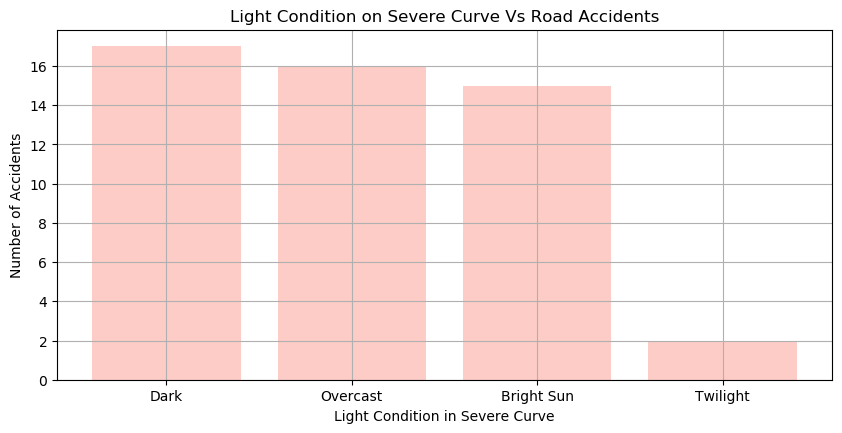

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:3
└ @ Core In[11]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:5
└ @ Core In[11]:5


PyObject Text(23.999999999999993, 0.5, 'Number of Accidents')

In [11]:
# Bar Plot for number of road fatalities in different light condition 
using PyPlot

x=CrashAnalysis_SevereCurve[:light]
y=CrashAnalysis_SevereCurve[:count]

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(x,y,color="#FA8072",align="center",alpha=0.4)
axis("tight")
PyPlot.title("Light Condition on Severe Curve Vs Road Accidents")
grid("on")
xlabel("Light Condition in Severe Curve")
ylabel("Number of Accidents")

In [12]:
# Light condtion for  Easy Curve
using DataFramesMeta
CrashAnalysis_EasyCurve= @where(CrashAnalysis_df, :roadCurvat .== "Easy Curve")

CrashAnalysis_EasyCurve=by(CrashAnalysis_EasyCurve,:light, d -> DataFrame(count=nrow(d)))

,light,count
,String⍰,Int64
1,Dark,202
2,Bright Sun,232
3,Overcast,195
4,Twilight,29
5,Unknown,1


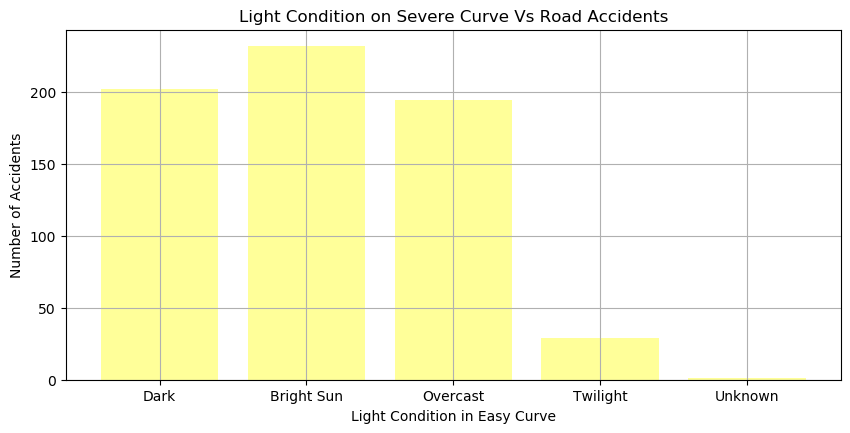

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:3
└ @ Core In[14]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:5
└ @ Core In[14]:5


PyObject Text(23.999999999999993, 0.5, 'Number of Accidents')

In [14]:
# Bar Plot for number of road fatalities in different light condition 
using PyPlot

x=CrashAnalysis_EasyCurve[:light]
y=CrashAnalysis_EasyCurve[:count]

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(x,y,color="#FFFF00",align="center",alpha=0.4)
axis("tight")
PyPlot.title("Light Condition on Severe Curve Vs Road Accidents")
grid("on")
xlabel("Light Condition in Easy Curve")
ylabel("Number of Accidents")